In [70]:
#Importing libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [6]:
#Loading data
data1 = pd.read_csv('C:/Users/bhavi/OneDrive/Desktop/Data/Time_Series_Data/airline_passengers.csv', index_col='Month', parse_dates=True)
data2 = pd.read_csv('C:/Users/bhavi/OneDrive/Desktop/Data/Time_Series_Data/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)

In [7]:
#Checking data
display(data1.head())
display(data2.head())

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


# Computing Auto Correlation Function

In [52]:
#Computing ACF
ACF1 = acf(data1['Thousands of Passengers'], nlags=40)
ACF2 = acf(data2['Births'], nlags=40)
ACF2

array([ 1.        ,  0.21724118,  0.15287758,  0.10821254,  0.09066059,
        0.09595481,  0.09104012,  0.19508071,  0.14115295,  0.06117859,
        0.04781522,  0.04770662, -0.01964707,  0.02287422,  0.08112657,
        0.11185686,  0.07333732,  0.01501845,  0.07270333,  0.06859   ,
        0.09280107,  0.26386846,  0.14012147,  0.06070286,  0.08716232,
        0.05038825,  0.0650489 ,  0.11466565,  0.1552232 ,  0.12850638,
        0.10358981,  0.09734643,  0.04912286,  0.04022798,  0.05838555,
        0.05359812,  0.10151053,  0.08268663,  0.0912185 ,  0.11192192,
        0.05652846])

In [55]:
#Creating legs
legs = []
for i in range(41):
    legs.append(i+1)

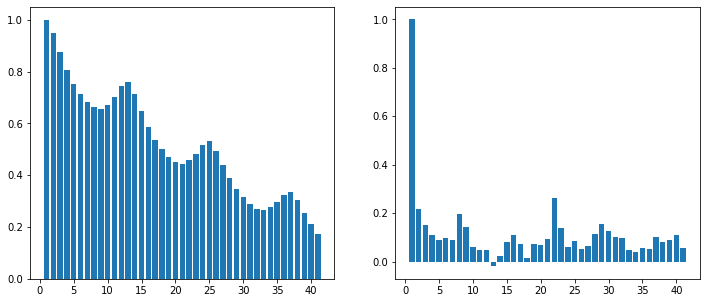

In [48]:
#Plotting ACF
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.bar(legs, ACF1);
plt.subplot(1,2,2)
plt.bar(legs, ACF2);

# Computing Auto Covariance Function

In [51]:
#Computing Auto Covariance Function
ACVF1 = acovf(data1['Thousands of Passengers'], nlag=40)
ACVF2 = acovf(data2['Births'], nlag=40)
ACVF2

array([53.84894727, 11.69820879,  8.23229673,  5.82713152,  4.88197758,
        5.16706571,  4.90241467, 10.50489068,  7.60093771,  3.29440264,
        2.57479946,  2.5689512 , -1.05797419,  1.23175271,  4.36858038,
        6.02337389,  3.94913756,  0.80872747,  3.91499781,  3.69349934,
        4.99724012, 14.2090387 ,  7.54539348,  3.26878523,  4.69359939,
        2.71335443,  3.50281486,  6.1746247 ,  8.35860568,  6.91993325,
        5.57820208,  5.24200292,  2.64521452,  2.16623434,  3.14400027,
        2.8862023 ,  5.46623507,  4.45258797,  4.91202026,  6.02687757,
        3.04399797])

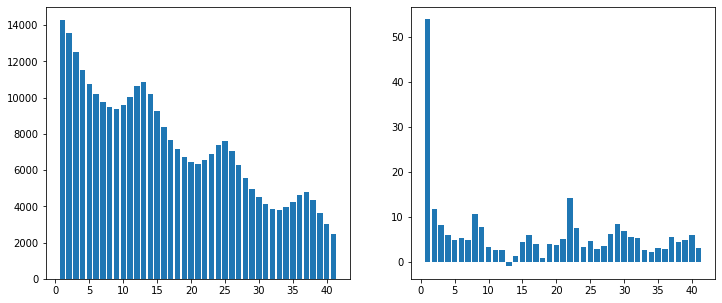

In [56]:
#Plotting ACVF
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.bar(legs, ACVF1);
plt.subplot(1,2,2)
plt.bar(legs, ACVF2);

# Computing Partial Auto Correlation Function

In [53]:
#Computing Partial Auto Correlation Function
PACF1 = pacf(data1['Thousands of Passengers'], nlags=40)
PACF2 = pacf(data2['Births'], nlags=40)
PACF2

array([ 1.00000000e+00,  2.17837995e-01,  1.11560408e-01,  5.85281386e-02,
        4.59786015e-02,  5.58720533e-02,  4.70202856e-02,  1.59717102e-01,
        6.10433685e-02, -2.55127376e-02, -9.04877171e-03,  6.47964202e-03,
       -7.05821878e-02,  5.05559721e-03,  5.36221091e-02,  6.87898847e-02,
        2.41597101e-02, -3.05684079e-02,  5.44254991e-02,  5.45428316e-02,
        6.74362575e-02,  2.37393430e-01,  1.52425267e-02, -5.96303432e-02,
        3.53062529e-02, -2.20894553e-02, -9.35210339e-04,  8.18797342e-02,
        5.42645544e-02,  6.15269037e-03,  4.44685601e-02,  4.49200259e-02,
       -1.26461361e-02,  2.68953225e-02,  1.81980871e-02, -4.23238915e-02,
        2.48536163e-02,  1.66890343e-02,  5.67408994e-02,  7.45154149e-02,
       -3.73655225e-03])

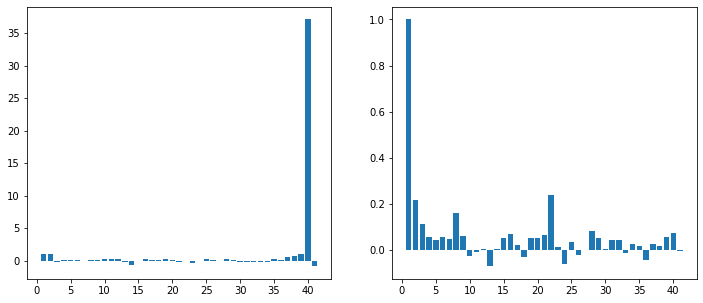

In [57]:
#Plotting PACF
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.bar(legs, PACF1);
plt.subplot(1,2,2)
plt.bar(legs, PACF2);

# Partial Auto Correlation of Yale Walker

In [58]:
#Creating PACF YL with adjusted method
PACF_YW1 = pacf_yw(data1['Thousands of Passengers'], nlags=40, method='adjusted')
PACF_YW2 = pacf_yw(data2['Births'], nlags=40, method='adjusted')
PACF_YW2

array([ 1.00000000e+00,  2.17837995e-01,  1.11560408e-01,  5.85281386e-02,
        4.59786015e-02,  5.58720533e-02,  4.70202856e-02,  1.59717102e-01,
        6.10433685e-02, -2.55127376e-02, -9.04877171e-03,  6.47964202e-03,
       -7.05821878e-02,  5.05559721e-03,  5.36221091e-02,  6.87898847e-02,
        2.41597101e-02, -3.05684079e-02,  5.44254991e-02,  5.45428316e-02,
        6.74362575e-02,  2.37393430e-01,  1.52425267e-02, -5.96303432e-02,
        3.53062529e-02, -2.20894553e-02, -9.35210339e-04,  8.18797342e-02,
        5.42645544e-02,  6.15269037e-03,  4.44685601e-02,  4.49200259e-02,
       -1.26461361e-02,  2.68953225e-02,  1.81980871e-02, -4.23238915e-02,
        2.48536163e-02,  1.66890343e-02,  5.67408994e-02,  7.45154149e-02,
       -3.73655225e-03])

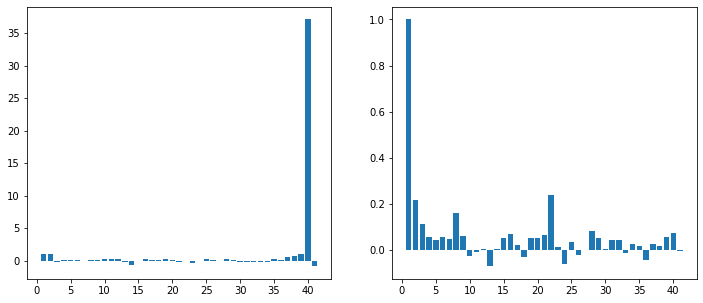

In [59]:
#Plotting PACF
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.bar(legs, PACF_YW1);
plt.subplot(1,2,2)
plt.bar(legs, PACF_YW2);

In [60]:
#Creating PACF YL with maximum likelihood estimation
PACF_YW3 = pacf_yw(data1['Thousands of Passengers'], nlags=40, method='mle')
PACF_YW4 = pacf_yw(data2['Births'], nlags=40, method='mle')
PACF_YW4

array([ 1.        ,  0.21724118,  0.11091851,  0.05800643,  0.04543103,
        0.05504982,  0.04617438,  0.15648712,  0.05939139, -0.02509098,
       -0.00890434,  0.00618762, -0.06821152,  0.00494821,  0.05147711,
        0.06574724,  0.02287367, -0.02919993,  0.05161131,  0.05139698,
        0.0633241 ,  0.22244509,  0.01256544, -0.05614002,  0.0324189 ,
       -0.02083772, -0.00113261,  0.07414523,  0.04841523,  0.00484985,
        0.03987566,  0.03980956, -0.01241855,  0.02299   ,  0.01444347,
       -0.0390127 ,  0.02148661,  0.0136852 ,  0.04949612,  0.06401633,
       -0.00526597])

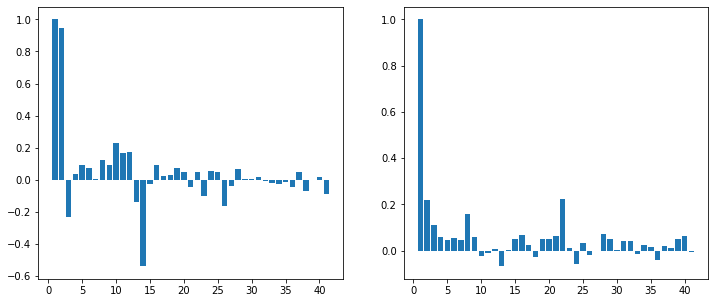

In [61]:
#Plotting PACF
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.bar(legs, PACF_YW3);
plt.subplot(1,2,2)
plt.bar(legs, PACF_YW4);

In [65]:
#Creating PACF YL with unbiased
PACF_YW5 = pacf_yw(data1['Thousands of Passengers'], nlags=40, method='unbiased')
PACF_YW6 = pacf_yw(data2['Births'], nlags=40, method='unbiased')
PACF_YW5

array([ 1.00000000e+00,  9.54677042e-01, -2.65277317e-01,  5.54695472e-02,
        1.08856215e-01,  8.11257853e-02,  4.12540544e-03,  1.56169553e-01,
        1.03708330e-01,  2.88781439e-01,  2.06918048e-01,  2.41129704e-01,
       -1.58004984e-01, -7.18324604e-01, -8.94806410e-02,  2.21605913e-01,
        1.34622533e-01,  1.15615719e-01,  1.94829396e-01,  9.66561845e-02,
       -2.02158680e-01, -9.36381005e-02, -3.45594572e-01, -1.06170206e-01,
        2.77804723e-01,  5.87815922e-02,  9.86624045e-03,  2.37687367e-01,
        9.40568218e-02, -1.47505422e-01, -1.88609051e-01, -2.52801158e-01,
       -2.57153789e-01, -1.40349613e-01,  1.88263087e-01,  1.30686258e-01,
        5.23902189e-01,  6.91426442e-01,  9.91163921e-01,  3.71021065e+01,
       -8.85334119e-01])

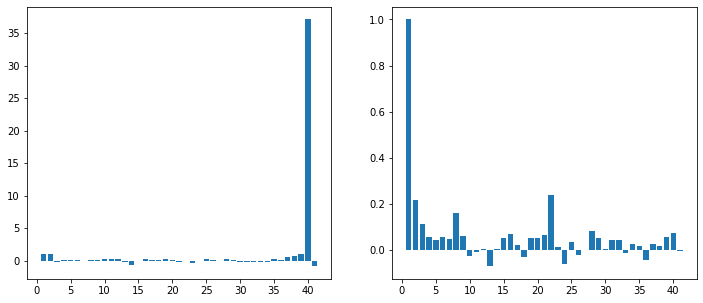

In [66]:
#Plotting PACF
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.bar(legs, PACF_YW5);
plt.subplot(1,2,2)
plt.bar(legs, PACF_YW6);

# Partial Auto Correlation Function with OLS

In [63]:
#Computing Partial Auto Correlation Function
PACF_OLS1 = pacf_ols(data1['Thousands of Passengers'], nlags=40)
PACF_OLS2 = pacf_ols(data2['Births'], nlags=40)
PACF_OLS2

array([ 1.        ,  0.2179641 ,  0.11388341,  0.06139271,  0.05014092,
        0.05597304,  0.0483302 ,  0.16061715,  0.061602  , -0.0245556 ,
       -0.00774957,  0.00782231, -0.07054357,  0.00367697,  0.05073901,
        0.06869818,  0.02855912, -0.03000743,  0.04890835,  0.05079005,
        0.06672663,  0.23464568,  0.01251561, -0.05701977,  0.03051524,
       -0.03035958, -0.00790227,  0.08244362,  0.05410409,  0.00122559,
        0.04213413,  0.03829265, -0.0147851 ,  0.02911748,  0.01617994,
       -0.03759518,  0.03129664,  0.01440593,  0.05191662,  0.07161683,
       -0.00544217])

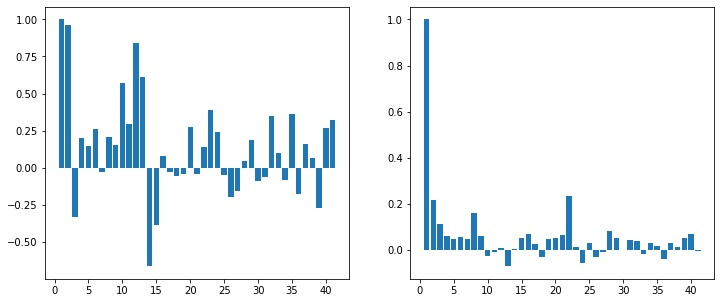

In [64]:
#Plotting PACF
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.bar(legs, PACF_OLS1);
plt.subplot(1,2,2)
plt.bar(legs, PACF_OLS2);

# Lag Plot

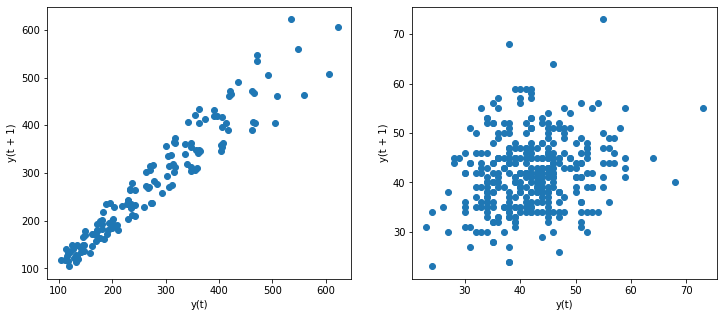

In [69]:
#Creating lag
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
lag_plot(data1['Thousands of Passengers']);
plt.subplot(1,2,2)
lag_plot(data2['Births']);

# Plotting Auto Correlation Function

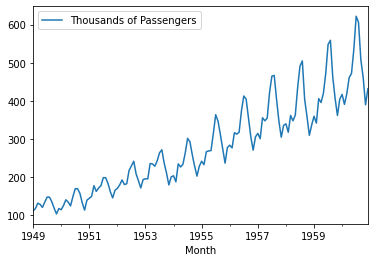

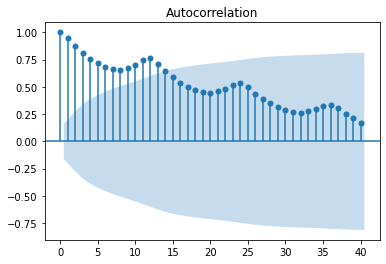

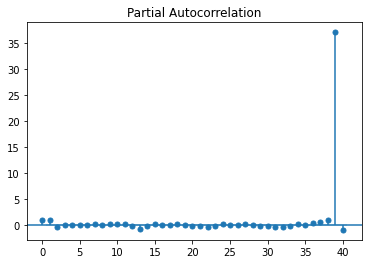

In [80]:
#Creating line plot on data
data1.plot();
#Creating ACF plot
plot_acf(data1['Thousands of Passengers'], lags=40);
#Creating ACF plot
plot_pacf(data1['Thousands of Passengers'], lags=40);

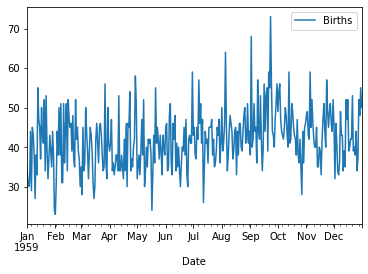

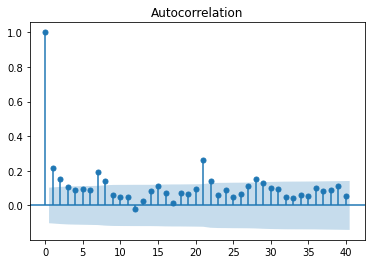

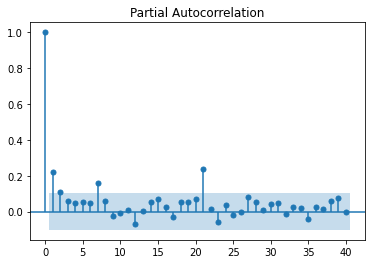

In [81]:
#Creating line plot on data
data2.plot();
#Creating ACF plot
plot_acf(data2['Births'], lags=40);
#Creating ACF plot
plot_pacf(data2['Births'], lags=40);